In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading Data
data = pd.read_csv('anaconda3\Lib\site-packages\pandas\io\headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [16]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [18]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#Using the formula to calculate m(slop of regression line) and c(constant coefficient c in slop line equation)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

#print coefficients
print(m, c)

0.26342933948939945 325.57342104944223


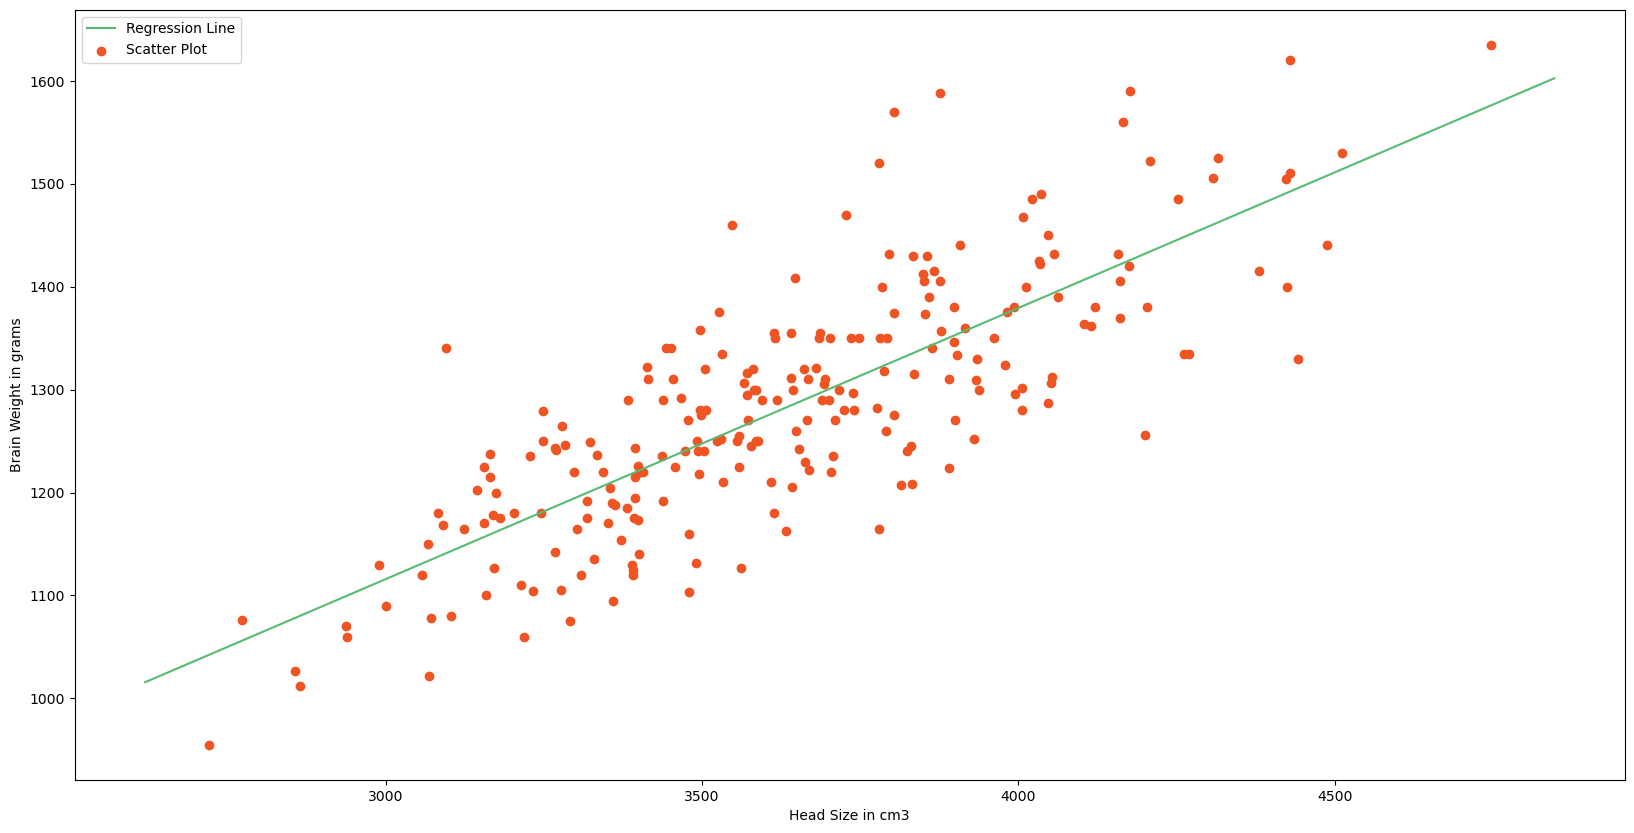

In [20]:
#Plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x

#Plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')
#Plotting scatter points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [26]:
#Calculating R^2 value
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (y_pred - mean_y) ** 2

#R^2 = sum(yi - Ymean)^2/sum(ypred - Ymean)^2
r2 = (ss_r/ss_t)
print(r2)

0.6393117199570001


In [28]:
#Calculating R2 using Scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matix in scikit learn
X = X.reshape(n, 1)
#creating Model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X, Y)
#Y Prediction
Y_pred = reg.predict(X)

#Calculating R2 Score

r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
